In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Importing Data

In [2]:
data = pd.read_csv('nyc_taxi_trip_duration.csv')

In [3]:
data.shape

(729322, 11)

In [4]:
data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In the Dataset, we have 729322 rows and 11 columns

Dataset Variables are as follows :
1. id — a unique identifier for each trip
2. vendor_id — a code indicating the provider associated with the trip record
3. pickup_datetime — date and time when the meter was engaged
4. dropoff_datetime — date and time when the meter was disengaged
5. passenger_count — the number of passengers in the vehicle (driver entered value)
6. pickup_longitude — the longitude where the meter was engaged
7. pickup_latitude — the latitude where the meter was engaged
8. dropoff_longitude — the longitude where the meter was disengaged
9. dropoff_latitude — the latitude where the meter was disengaged
10. store_and_fwd_flag — This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server — Y=store and forward; N=not a store and forward trip.
11. trip_duration — duration of the trip in seconds

In [5]:
data.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [6]:
#sample of first 5 rows
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,29-02-2016 16:40,29-02-2016 16:47,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,11-03-2016 23:35,11-03-2016 23:53,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,21-02-2016 17:59,21-02-2016 18:26,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,05-01-2016 09:44,05-01-2016 10:03,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,17-02-2016 06:42,17-02-2016 06:56,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [7]:
#sample of first 5 rows
data.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
729317,id3905982,2,21-05-2016 13:29,21-05-2016 13:34,2,-73.965919,40.789780,-73.952637,40.789181,N,296
729318,id0102861,1,22-02-2016 00:43,22-02-2016 00:48,1,-73.996666,40.737434,-74.001320,40.731911,N,315
729319,id0439699,1,15-04-2016 18:56,15-04-2016 19:08,1,-73.997849,40.761696,-74.001488,40.741207,N,673
729320,id2078912,1,19-06-2016 09:50,19-06-2016 09:58,1,-74.006706,40.708244,-74.013550,40.713814,N,447
729321,id1053441,2,01-01-2016 17:24,01-01-2016 17:44,4,-74.003342,40.743839,-73.945847,40.712841,N,1224


Checking for null values

In [8]:
data.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In this dataset, we have 0 missing values and it's good to go further and work on each datatype of the dataset.

In [9]:
# Converting store_and_fwd_flag to category
data['store_and_fwd_flag'] = data['store_and_fwd_flag'].astype('category')

In [10]:
# Converting pickup and dropoff datetime from object to datetime
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])
data['dropoff_datetime'] = pd.to_datetime(data['dropoff_datetime'])

In [11]:
data.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,7.293220e+05
mean,1.535403,1.662055,-73.973513,40.750919,-73.973422,40.751775,9.522291e+02
std,0.498745,1.312446,0.069754,0.033594,0.069588,0.036037,3.864626e+03
min,1.000000,0.000000,-121.933342,34.712235,-121.933304,32.181141,1.000000e+00
25%,1.000000,1.000000,-73.991859,40.737335,-73.991318,40.735931,3.970000e+02
50%,2.000000,1.000000,-73.981758,40.754070,-73.979759,40.754509,6.630000e+02
75%,2.000000,2.000000,-73.967361,40.768314,-73.963036,40.769741,1.075000e+03
max,2.000000,9.000000,-65.897385,51.881084,-65.897385,43.921028,1.939736e+06


In [12]:
# Using datetime to create new columns - day_name, day_number, month, pickup_hour

data['day_name'] = data.pickup_datetime.dt.day
data['month'] = data.pickup_datetime.dt.month
data['day_number'] = data.pickup_datetime.dt.weekday
data['pickup_hour'] = data.pickup_datetime.dt.hour

In [13]:
# Converting day_number, month, pickup_hour to category

data['month'] = data['month'].astype('category')
data['day_number'] = data['day_number'].astype('category')
data['pickup_hour'] = data['pickup_hour'].astype('category')

In [14]:
data.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag          category
trip_duration                  int64
day_name                       int64
month                       category
day_number                  category
pickup_hour                 category
dtype: object

Looking at the dataset, we come to a point that the dataset is time and distance related. So, we can calculate the distance travelled for each and every trip.

In [15]:
# Importing geopy which can be used for distance calculation
import geopy.distance

def calc_dist(df):
    pickup = (df['pickup_latitude'], df['pickup_longitude'])
    dropoff = (df['dropoff_latitude'], df['dropoff_longitude'])
    return geopy.distance.distance(pickup, dropoff).km

In [16]:
# Adding the distance column in our dataframe

data['distance'] = data.apply(lambda x: calc_dist(x), axis=1)

We can calculate the speed of the vehicle at each trip by the distance and the trip duration.

In [17]:
data['speed'] = (data.distance/(data.trip_duration/3600))

In [18]:
# Considering only upto 6 passenger count to prevent any of the outlier

data = data[(data['passenger_count'] <= 6) & (data['passenger_count'] >0)]

In [19]:
# Converting all the categorical variables to numerical

dummy = pd.get_dummies(data.store_and_fwd_flag, prefix = 'flag')
data = pd.concat([data, dummy], axis =1)

dummy = pd.get_dummies(data.vendor_id, prefix = 'vendor_id')
data = pd.concat([data, dummy], axis =1)

dummy = pd.get_dummies(data.month, prefix = 'month')
data = pd.concat([data, dummy], axis = 1)

dummy = pd.get_dummies(data.day_number, prefix = 'day_number')
data = pd.concat([data,dummy], axis = 1)

dummy = pd.get_dummies(data.pickup_hour, prefix = 'pickup_hour')
data = pd.concat([data, dummy], axis = 1)

dummy = pd.get_dummies(data.passenger_count, prefix = 'passenger_count')
data = pd.concat([data, dummy], axis = 1)

In [20]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_hour_20,pickup_hour_21,pickup_hour_22,pickup_hour_23,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6
0,id1080784,2,2016-02-29 16:40:00,2016-02-29 16:47:00,1,-73.953918,40.778873,-73.963875,40.771164,N,...,0,0,0,0,1,0,0,0,0,0
1,id0889885,1,2016-11-03 23:35:00,2016-11-03 23:53:00,2,-73.988312,40.731743,-73.994751,40.694931,N,...,0,0,0,1,0,1,0,0,0,0
2,id0857912,2,2016-02-21 17:59:00,2016-02-21 18:26:00,2,-73.997314,40.721458,-73.948029,40.774918,N,...,0,0,0,0,0,1,0,0,0,0
3,id3744273,2,2016-05-01 09:44:00,2016-05-01 10:03:00,6,-73.961670,40.759720,-73.956779,40.780628,N,...,0,0,0,0,0,0,0,0,0,1
4,id0232939,1,2016-02-17 06:42:00,2016-02-17 06:56:00,1,-74.017120,40.708469,-73.988182,40.740631,N,...,0,0,0,0,1,0,0,0,0,0


Droping out the unwanted columns from the dataframe.

In [21]:
data = data.drop(['id'], axis = 1)

In [22]:
data = data.drop(['store_and_fwd_flag'], axis = 1)

In [23]:
data = data.drop(['vendor_id'], axis = 1)

In [24]:
data = data.drop(['pickup_datetime'], axis = 1)

In [25]:
data = data.drop(['dropoff_datetime'], axis = 1)

In [26]:
data = data.drop(['day_name'], axis = 1)

Plotting distribution of trip duration and distance for checking outliers.

Text(0.5, 1.0, 'Distribution of trip duration')

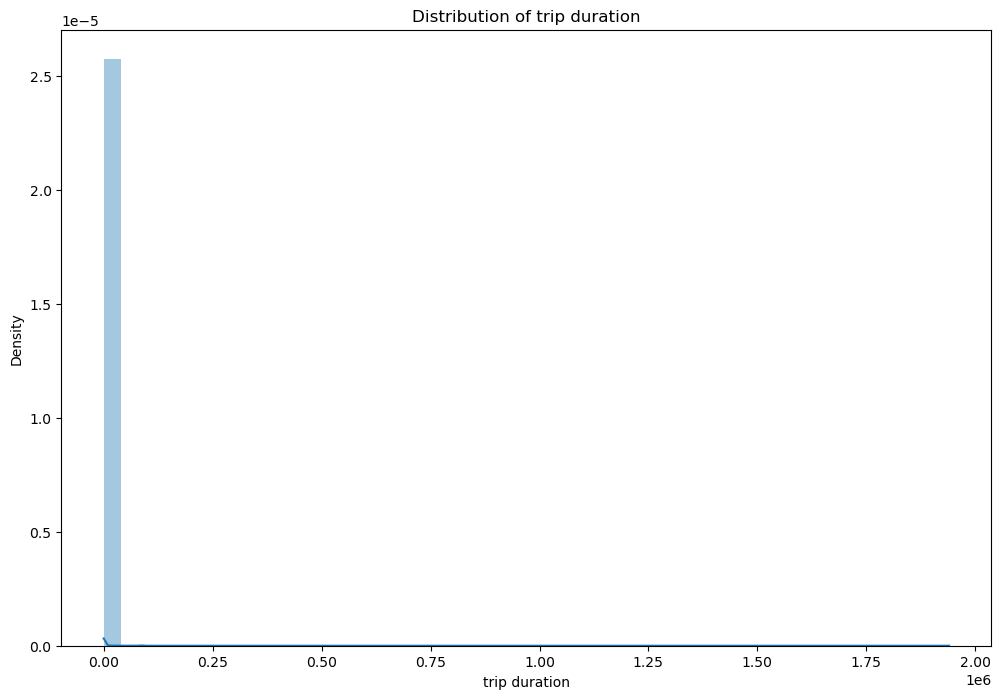

In [27]:
plt.figure(figsize=(12, 8))
sns.distplot(data['trip_duration'])
plt.xlabel('trip duration')
plt.title('Distribution of trip duration')

Text(0.5, 1.0, 'Distribution of distance')

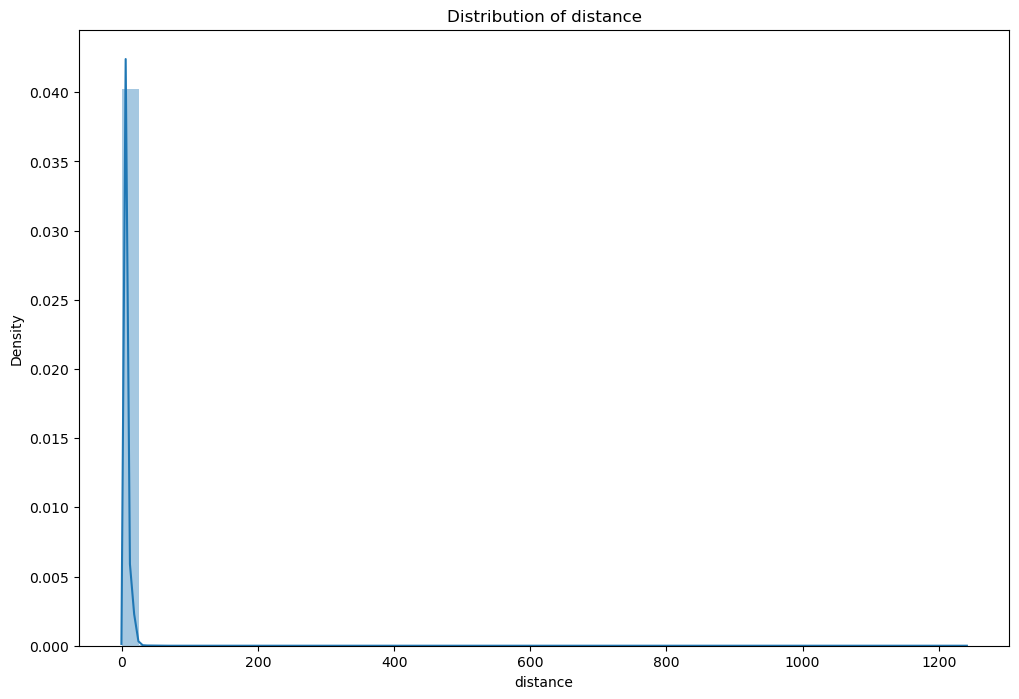

In [28]:
plt.figure(figsize=(12, 8))
sns.distplot(data['distance'])
plt.xlabel('distance')
plt.title('Distribution of distance')

We have to remove the potential outliers from distance and trip duration. Here, we have chosen the trip duration part normally greater than 10 seconds and less than 0.5 day.

In [29]:
# Removing potential distance outlier

data = data[(data['distance'] < data['distance'].quantile(0.95)) & (data['distance'] > data['distance'].quantile(0.05))]

# Removing potential trip duration outlier

data = data[(data['trip_duration'] < 3*3600) & (data['trip_duration'] > 10)]
data = data[(data['trip_duration'] < data['trip_duration'].quantile(0.95)) & (data['trip_duration'] > data['trip_duration'].quantile(0.05))]

Selecting Metric for Evaluation and Building Simple Model

In [30]:
# Creating a raw data copy
data_copy  = data

In [31]:
from sklearn.utils import shuffle

# Shuffling the dataset
data_copy = shuffle(data_copy, random_state = 30)

# Creating 4 divisions
div = int(data_copy.shape[0]/4)

# We will divide the 4 division - 3 for training part and 1 for testing

train = data_copy.loc[:3*div+1,:]
test = data_copy.loc[3*div+1:]

Calculating Mean of trip duration

In [32]:
# storing mean in the test set as a new column
test['mean'] = train['trip_duration'].mean()

# calculating mean absolute error
from sklearn.metrics import mean_absolute_error as MAE

mean_error = MAE(test['trip_duration'], test['mean'])
mean_error

302.9729421962103

I chosed the most appropriate Evaluation metric for this dataset - Mean Absolute Error because I have used the distance and speed variable concept which is related to time duration also most of the outliers in the data are removed and so mean squared or root mean squared error will not be felt required

Linear Regression with Regularization

In [33]:
# separating independent and dependent variables
x5 = data.drop(['trip_duration'], axis =1)
y5 = data['trip_duration']
x5.shape, y5.shape

((589827, 63), (589827,))

In [34]:
# Importing the train test split function
from sklearn.model_selection import train_test_split
train_x5, test_x5, train_y5, test_y5 = train_test_split(x5, y5, random_state = 65)

In [35]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error as Mae

In [36]:
# Creating instance of Linear Regression
lin_reg = LR(normalize = True)

# Fitting the model
lin_reg.fit(train_x5, train_y5)

LinearRegression(normalize=True)

In [37]:
# Predicting over the train set and calculating the errors
train_pred = lin_reg.predict(train_x5)
k1 = Mae(train_pred, train_y5)
print('Training Mean Absolute Error is- ', k1)

Training Mean Absolute Error is-  106.26358139114316


In [38]:
# Predicting over the test set and calculating the errors
test_pred = lin_reg.predict(test_x5)
k1 = Mae(test_pred, test_y5)
print('Test Mean Absolute Error is- ', k1)

Test Mean Absolute Error is-  106.15373464806689


In [39]:
# Importing Ridge from sklearn
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV

In [40]:
# Creating Ridge Regression with alpha values
reg_cv = RidgeCV(alphas = [0.1, 0.5, 1.0, 10.0])

In [41]:
#fitting the model into ridge cv
model_cv = reg_cv.fit(x5, y5)

In [42]:
#finding the best value of alpha
model_cv.alpha_

0.5

In [43]:
#Selecting alpha=0.5 for ridge regression
rid_reg = Ridge(alpha = 0.5)

In [44]:
# fitting the model on the training set
rid_reg.fit(train_x5,train_y5)

Ridge(alpha=0.5)

In [45]:
#prediction on the training set
pred_reg_train = rid_reg.predict(train_x5)
linear_train = Mae(train_y5, pred_reg_train)
linear_train

106.3282845835947

In [46]:
Linear_training = 1 - (linear_train/mean_error)
Linear_training

0.6490502293279552

In [47]:
#prediction on the test set
pred_reg_test = rid_reg.predict(test_x5)
linear_test = Mae(test_y5, pred_reg_test)
linear_test

106.22235852127703

In [48]:
Linear_testing = 1 - (linear_test/mean_error)
Linear_testing

0.6493998515138502

Decision Tree Model

In [49]:
data.columns

Index(['passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'trip_duration', 'month',
       'day_number', 'pickup_hour', 'distance', 'speed', 'flag_N', 'flag_Y',
       'vendor_id_1', 'vendor_id_2', 'month_1', 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
       'month_10', 'month_11', 'month_12', 'day_number_0', 'day_number_1',
       'day_number_2', 'day_number_3', 'day_number_4', 'day_number_5',
       'day_number_6', 'pickup_hour_0', 'pickup_hour_1', 'pickup_hour_2',
       'pickup_hour_3', 'pickup_hour_4', 'pickup_hour_5', 'pickup_hour_6',
       'pickup_hour_7', 'pickup_hour_8', 'pickup_hour_9', 'pickup_hour_10',
       'pickup_hour_11', 'pickup_hour_12', 'pickup_hour_13', 'pickup_hour_14',
       'pickup_hour_15', 'pickup_hour_16', 'pickup_hour_17', 'pickup_hour_18',
       'pickup_hour_19', 'pickup_hour_20', 'pickup_hour_21', 'pickup_hour_22',
       'pickup_hour_23', 'passeng

In [50]:
#Shuffling the dataset

from sklearn.utils import shuffle
data = shuffle(data, random_state = 42)

In [51]:
#Separating the independent and dependent variables

x2 = data.drop(['trip_duration'], axis = 1)
y2 = data['trip_duration']

In [52]:
#Importing library and creating the train and test set

from sklearn.model_selection import train_test_split
train_x6, test_x6, train_y6, test_y6 = train_test_split(x2, y2, random_state = 101, test_size = 0.20)

In [53]:
#Creating the train and validation set

train_x7, valid_x6, train_y7, valid_y6 = train_test_split(train_x6, train_y6, random_state = 101, test_size = 0.20)

In [54]:
#Importing Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dec_mod = DecisionTreeRegressor(random_state = 10)

In [55]:
dec_mod.fit(train_x7, train_y7)

DecisionTreeRegressor(random_state=10)

In [56]:
#Checking the train score

dec_mod.score(train_x7, train_y7)

1.0

In [57]:
#Checking the validation score

dec_mod.score(valid_x6, valid_y6)

0.9998166883781183

We noticed that both train and validation have a good score and we need to check whether there's overfitting and to interpret that how different properties influence the tree. Next, interpreting accuracy relative to max depth

In [58]:
train_acc = []
validation_acc = []
for dep in range(1, 15):
    dec_mod = DecisionTreeRegressor(max_depth = dep, min_impurity_decrease = 1000, random_state=10)
    dec_mod.fit(train_x7, train_y7)
    train_acc.append(dec_mod.score(train_x7, train_y7))
    validation_acc.append(dec_mod.score(valid_x6, valid_y6))

In [59]:
#Collecting this data into a dataframe
df = pd.DataFrame({'max_depth' : range(1, 15), 'tr_acc' : train_acc, 'valid_acc' : validation_acc})
df.head()

,max_depth,tr_acc,valid_acc
0,1,0.348427,0.347822
1,2,0.498316,0.496411
2,3,0.703813,0.701247
3,4,0.813101,0.811847
4,5,0.855920,0.854684


Text(0, 0.5, 'performance')

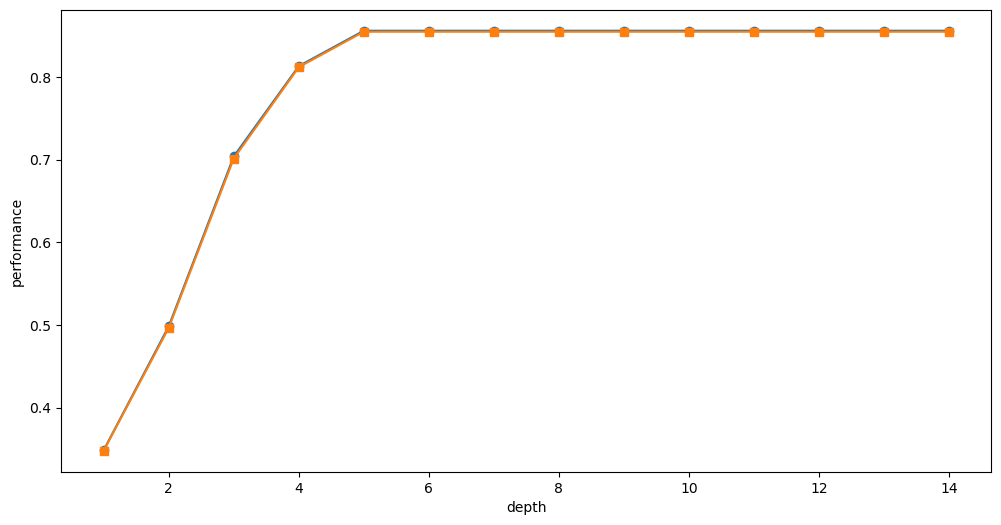

In [60]:
#Plotting maxdepth relative
plt.figure(figsize = (12, 6))
plt.plot(df['max_depth'], df['tr_acc'], marker = 'o')
plt.plot(df['max_depth'], df['valid_acc'], marker = 's')
plt.xlabel('depth')
plt.ylabel('performance')

The best Maximum Depth is at 9 while further plot is constant and overfitting might be the reason for this

In [61]:
#Creating a function for iterating over different max features and finding train and validation score

train_accura = []
validation_accura = []
for feat in range(1, 35):
    dec_mod = DecisionTreeRegressor(max_depth = 9, max_features = feat, min_samples_leaf = 1000, random_state = 10)
    dec_mod.fit(train_x7, train_y7)
    train_accura.append(dec_mod.score(train_x7, train_y7))
    validation_accura.append(dec_mod.score(valid_x6, valid_y6))

In [62]:
#Collecting the above data into a dataframe
df = pd.DataFrame({'max_features':range(1, 35), 'train_acc':train_accura, 'valid_acc':validation_accura})
df.head()

,max_features,train_acc,valid_acc
0,1,0.062160,0.063829
1,2,0.370484,0.368965
2,3,0.445187,0.445262
3,4,0.424375,0.420536
4,5,0.530915,0.527493


Text(0, 0.5, 'Performance')

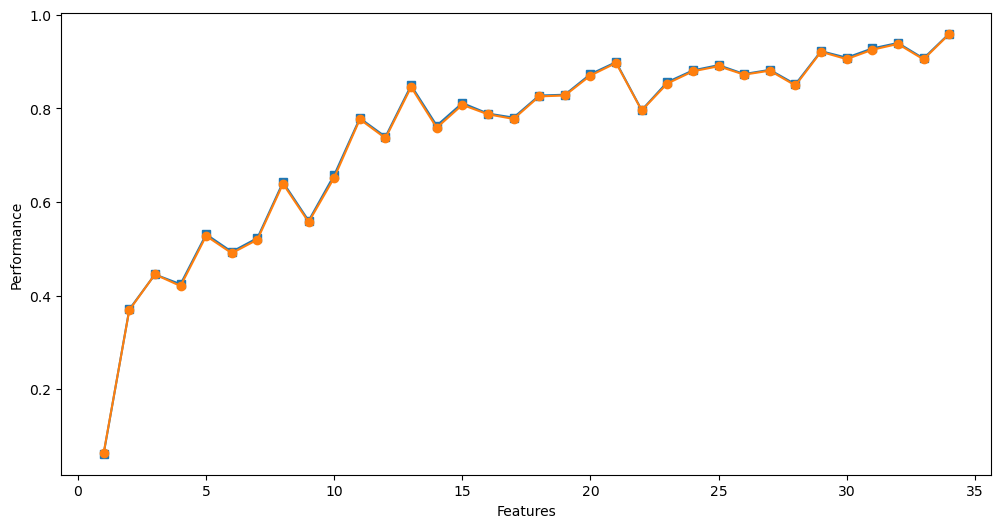

In [63]:
#Plotting the max features according to the model score

plt.figure(figsize =(12, 6))
plt.plot(df['max_features'], df['train_acc'], marker = 's')
plt.plot(df['max_features'], df['valid_acc'], marker = 'o')
plt.xlabel('Features')
plt.ylabel('Performance')

The best no. of feature from the plot is 31. Moving on selecting the max feature and depth and finding train and test score.

In [64]:
DecisionTreeRegressor(max_depth = 9, max_features = 31, min_samples_leaf = 1000, random_state =10)

DecisionTreeRegressor(max_depth=9, max_features=31, min_samples_leaf=1000,
                      random_state=10)

In [65]:
#Fitting this model

dec_mod.fit(train_x7, train_y7)

DecisionTreeRegressor(max_depth=9, max_features=34, min_samples_leaf=1000,
                      random_state=10)

In [66]:
#Training Score
dec_train = dec_mod.score(train_x7, train_y7)
dec_train

0.9595839558049098

In [67]:
#Validation Score
dec_mod.score(valid_x6, valid_y6)

0.9584519935010996

Finally, at last we see how this model performs on the test data

In [68]:
dec_test = dec_mod.score(test_x6, test_y6)
dec_test

0.9586103973724032

We get to see that the data didn't overfit and a good test score is obtained.

K-Nearest Neighbour Model

In [69]:
#Separating dependent and independent variables

x = data.drop(['trip_duration'], axis =1)
y = data['trip_duration']

In [70]:
#Importing MinMax Scaler

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scale = scaler.fit_transform(x)

In [71]:
frame = pd.DataFrame(x_scale, columns= x.columns)

In [72]:
#Creating train and test sets
from sklearn.model_selection import train_test_split
train_x3, test_x3, train_y3, test_y3 = train_test_split(frame,y, random_state = 65)

In [73]:
# Importing KNN Regressor and Evaluation Metric MAE
from sklearn.neighbors import KNeighborsRegressor as knn
from sklearn.metrics import mean_absolute_error as mae

In [74]:
# Creating instance of KNN
regr = knn(n_neighbors = 2)

# Fitting the model
regr.fit(train_x3, train_y3)

KNeighborsRegressor(n_neighbors=2)

In [75]:
train_pred = regr.predict(train_x3)

In [80]:
k2 = mae(train_y3, train_pred)
KNN_train = 1 - (k2/mean_error)
print('Train MAE score is -', KNN_train)

Train MAE score is - 0.7590066244232464


In [81]:
test_pred = regr.predict(test_x3)
k4 = MAE(test_pred, test_y3)
KNN_Test = 1 - (k4/mean_error)
print('Test MAE score is -', KNN_Test)

Test MAE score is - 0.5618801185421891


With respect to KNN model, after trying over different values of n neighbors and using predict for the training dataset, there is a failure of the output due to lack of computational capacity or the system freezes. With this model, there is no particular conclusion. Even after trying the concept of k values, still the same problem arises. It is better not to use KNN for this dataset.

Comparing Models

In [82]:
p = {'type':['train','test','train','test'],
     'model': ['linear','linear','decision_tree','decision_tree'],
     'score': [Linear_training, Linear_testing,dec_train,dec_test]
    }


df = pd.DataFrame(p)

<AxesSubplot:xlabel='model', ylabel='score'>

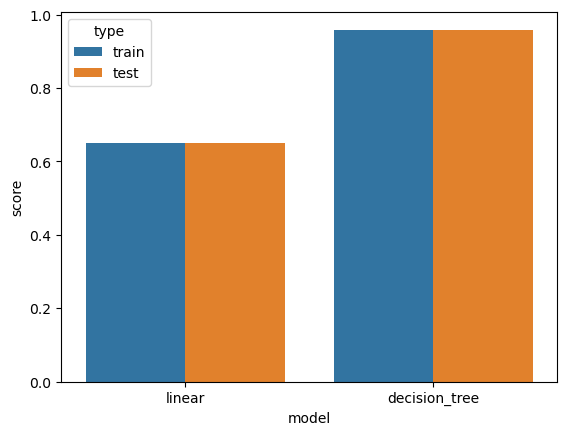

In [83]:
sns.barplot(data = df,x = 'model' ,y = 'score',hue = 'type',ci = None )

Looking at the plot, it is clear that the Decision tree is giving best output for prediction of data.